# Pymaceuticals Inc.
---

### Analysis
- 249 mice with SCC tumors were treated with a variety of drug regimens. The tumor growth was observed over a period of 45 days, and results were logged in the data set
- Of the 249 mice, the split between male and female was rougly 50/50
- Capomulin and Ramicane had the most timepoints observed, and were also the most successful in reducing the tumor size
- For mice treated with Capomulin, tumor volume peaked at day 20 and shrunk around ~7mm3 by Day 45
- For mice treated with Capomulin, there is a strong positive correlation between tumor size and mouse weight(as indicated by the .70 Rsquared value is .70)

 

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how="outer")

# Display the data table for preview
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
number_mice = len(merged_df['Mouse ID'].unique())
number_mice


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_ids = merged_df.loc[merged_df.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_ids


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_info = merged_df[(merged_df["Mouse ID"]=="g989")]
duplicate_mouse_info


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# CHECK ME
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = merged_df.drop_duplicates(subset = ["Mouse ID"], keep = "first" ,inplace=False, ignore_index=False)
#clean_df

clean_df= merged_df[(merged_df["Mouse ID"]!="g989")]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
variance = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
standard_deviation = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
SEM = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()


stats_df = pd.DataFrame({"Mean": mean,
                        "Median": median,
                        "Variance": variance,
                        "Standard Deviation": standard_deviation,
                       "SEM": SEM})
stats_df

# Using the aggregation method, produce the same summary statistics in a single line.
stats_df_1 = stats_df.aggregate
stats_df_1

<bound method DataFrame.aggregate of                    Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398>

Text(0, 0.5, 'Number of Mice')

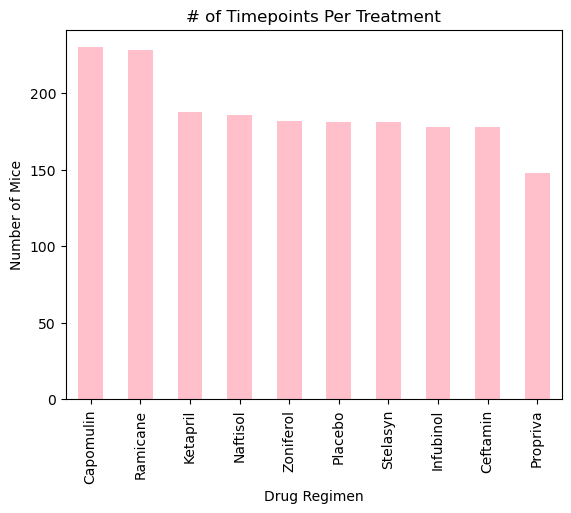

In [77]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
chart_df = clean_df["Drug Regimen"].value_counts()
chart_df.plot.bar(x="Drug Regimen", color ="pink", title = "# of Timepoints Per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

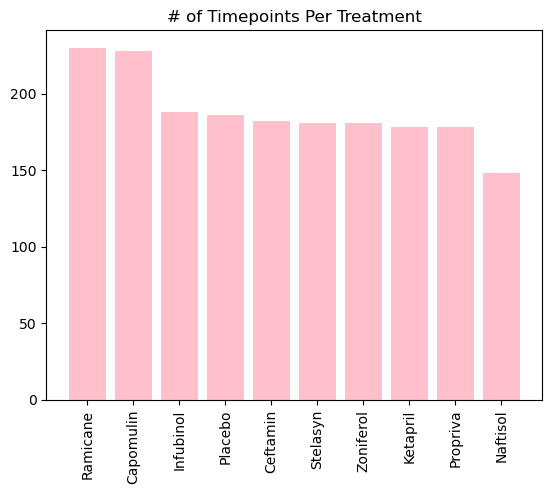

In [76]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
treatment = clean_df["Drug Regimen"].unique()
number_of_treatments = clean_df["Drug Regimen"].value_counts()

plt.bar(treatment, number_of_treatments, color = "pink", align = "center")
plt.title("# of Timepoints Per Treatment")
plt.xticks(rotation = 90)


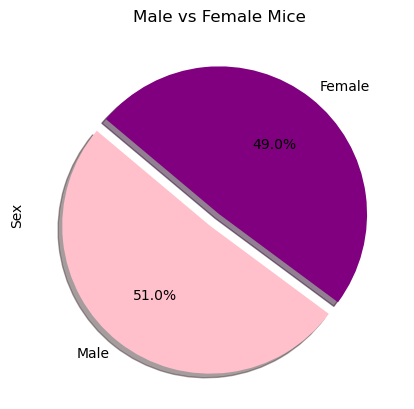

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = pd.DataFrame(clean_df["Sex"].value_counts())
explode = (0.1,0)
colors = ["pink", 'purple']
gender_df.plot.pie(y="Sex",autopct="%1.1f%%", shadow=True, startangle=140, legend = False, explode = explode, colors = colors)
plt.title("Male vs Female Mice")
plt.show()




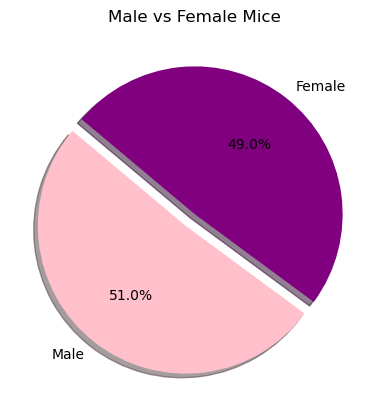

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
number = [51.0, 49.0]
colors = ["pink", 'purple']
explode = (0.1,0)

plt.pie(number, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male vs Female Mice")
plt.show()




## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
                            
# Start by getting the last (greatest) timepoint for each mouse
final_df = clean_df.groupby('Mouse ID')['Timepoint'].max()
final_df = final_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_merged_df = pd.merge(final_df, clean_df, left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'],how="inner")
final_merged_df




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [61]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_merged_df.loc[final_merged_df["Drug Regimen"]==treatment,"Tumor Volume (mm3)"]
        
    #add subset
    tumor_data.append(tumor_volume)
        
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = round(lowerq - (1.5*iqr),1)
    upper_bound = round(upperq + (1.5*iqr),1)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound)|(tumor_volume > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")  

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

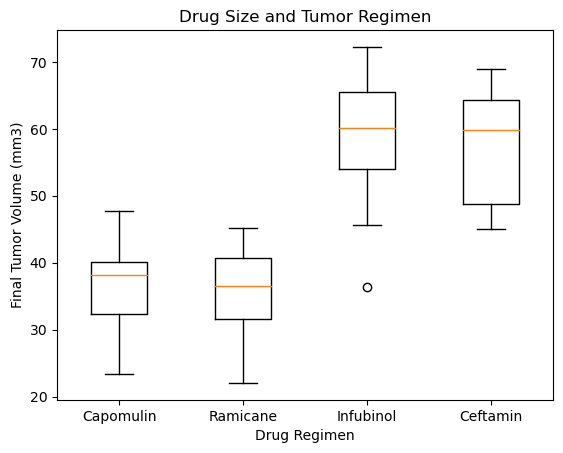

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = tumor_data

fig1, ax1 = plt.subplots()
ax1.set_title('Drug Size and Tumor Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')

ax1.boxplot(data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

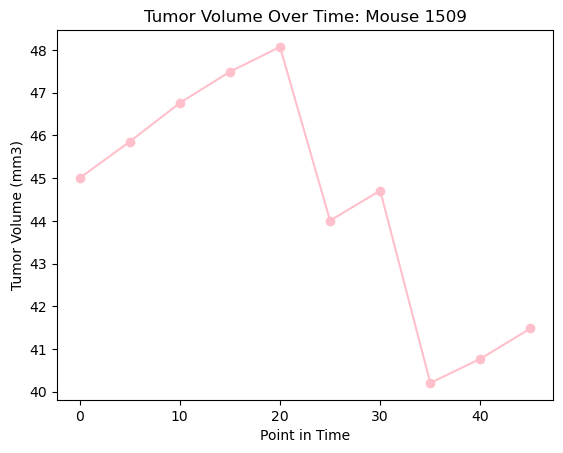

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
one_mouse_data = merged_df[(merged_df["Mouse ID"]== "l509")]

x_axis = one_mouse_data["Timepoint"]
y_axis = one_mouse_data["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Tumor Volume Over Time: Mouse 1509")
plt.plot(x_axis, y_axis, marker="o",color="pink")
plt.xlabel("Point in Time")
plt.ylabel("Tumor Volume (mm3)")


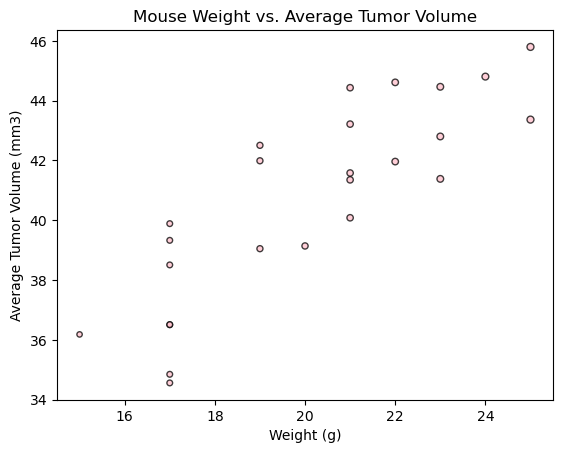

In [57]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_data = merged_df[(merged_df["Drug Regimen"]== "Capomulin")]
average_data = pd.DataFrame(scatter_data).groupby(scatter_data["Mouse ID"]).mean()
x_axis = average_data["Weight (g)"]
y_axis = average_data["Tumor Volume (mm3)"]
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.scatter(x_axis, y_axis, marker="o", facecolors="pink", edgecolors="black",s=x_axis, alpha=0.75)



## Correlation and Regression

The r-squared is: 0.709


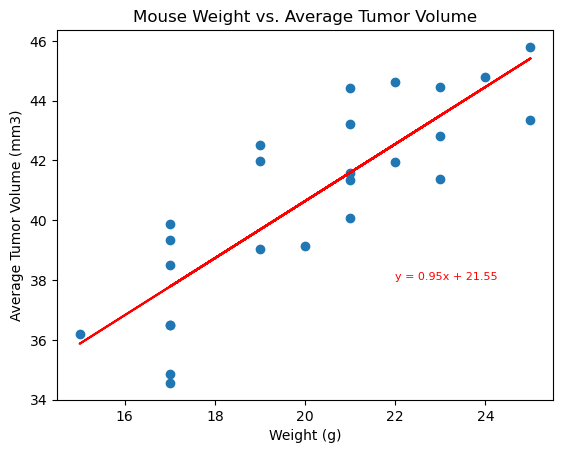

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = average_data["Weight (g)"]
y_values = average_data["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_eq,(22,38),fontsize=8,color="red")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()
